<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 1 : Groupement de clients avec _k_-moyennes

Le but de ce laboratoire est de diviser en groupes cohérents les clients d'un centre commercial, en utilisant la méthode des [_k_-moyennes implémentée dans Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Les données viennent de Kaggle: [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) (fournies avec le notebook).  Il n'y a pas d'annotation de référence des groupes, donc ce sera à vous de juger leur qualité grâce à la visualisation.  

Le travail comporte les étapes suivantes :
1. Analyse exploratoire des données.
2. Application simple des _k_-moyennes en 2D.
3. Améliorations: optimisation du nombre de groupes, 3D.

Veuillez répondre aux questions de chaque étape en écrivant d'abord les commandes nécessaires, puis en commentant le résultat si nécessaire.

Il est conseillé de créer un nouvel environnement Conda pour le cours d'APN, par exemple en utilisant la commande `conda create -n cours_apn --file requirements.txt`.  Le fichier _requirements.txt_ fourni avec le notebook liste les packages à installer. 

***
**Muhlemann Julien** \
**Ronquillo Cristhian**
***

In [269]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## 1. Analyse exploratoire des données

Veuillez lire les données du fichier `Mail_Customers.csv` dans une *data frame* Pandas nommée `clients_df` et examinez-la.  Veuillez répondre aux questions suivantes en utilisant les commandes appropriées.

a. Combien de clients figurent dans les données ?<br>
b. Combien d'attributs y a-t-il pour chaque client ?  Quels sont leurs noms ?<br>
c. Y a-t-il des données manquantes ?<br>
d. Quel est le *5 number summary* pour chaque attribut?

In [270]:
# Votre code ici:
clients_df = pd.read_csv('Mall_Customers.csv')
clients_df.shape
print(clients_df)
clients_df.isna().sum().sum()
five_n = pd.DataFrame(data=clients_df.describe())
five_n[3:]

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
min,1.00,18.00,15.0,1.00
25%,50.75,28.75,41.5,34.75
50%,100.50,36.00,61.5,50.00
75%,150.25,49.00,78.0,73.00
max,200.00,70.00,137.0,99.00


a. 200 clients figurent dans le dataframe. \
b. les cinq attributs sont: CustomerID, Gender, Age, Annual Income, Spending Score.\
c. Non n'avons pas de valeurs manquantes dans le DF.\
d. le 'five number summary' est affiché avec la commende précédente.   |

        

In [271]:
# Vos commentaires ici, si nécessaire:


e. Combien de personnes sont des femmes, et combien des hommes ?<br>
f. Quel est le revenu annuel moyen par sexe ? Quel est le *spending score* moyen par sexe ?<br>
g. Quelles sont les valeurs extrêmes de l'âge pour les femmes ? Et pour les hommes ?<br>
h. Même question pour le revenu annuel, puis pour le *spending score*.<br>

In [272]:
# Votre code ici: Question e)
print(f"nombre de femmes: {clients_df[clients_df['Gender'] == 'Female']['Gender'].count()}")
print(f"nombre d'hommes: {clients_df[clients_df['Gender'] == 'Male']['Gender'].count()}")


nombre de femmes: 112
nombre d'hommes: 88


In [273]:
# Question f)
print(f"Spending score des femmes: {clients_df[clients_df['Gender'] == 'Female']['Spending Score (1-100)'].mean()}")
print(f"Spending score des hommes: {clients_df[clients_df['Gender'] == 'Male']['Spending Score (1-100)'].mean()}")

Spending score des femmes: 51.526785714285715
Spending score des hommes: 48.51136363636363


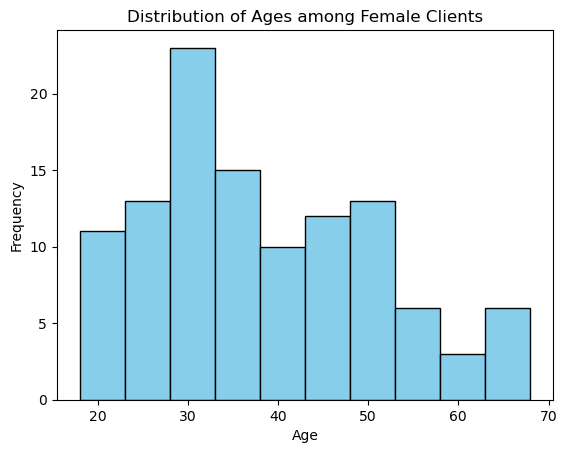

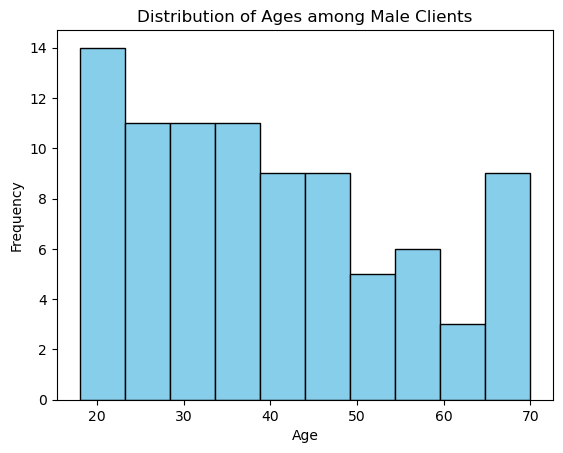

In [274]:
# Question g)
female_ages = clients_df[clients_df['Gender'] == 'Female']['Age']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Ages among Female Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

female_ages = clients_df[clients_df['Gender'] == 'Male']['Age']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Ages among Male Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Nous n'avons pas de valeurs dites aberrantes 

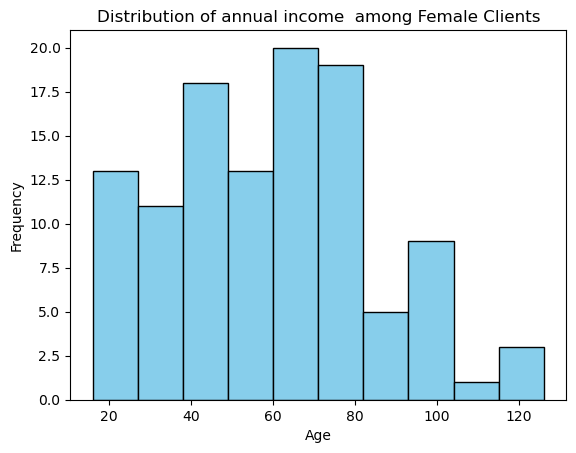

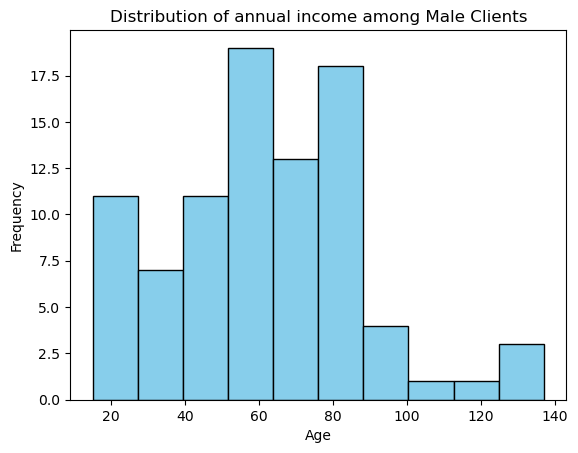

In [275]:
# Question h)

female_ages = clients_df[clients_df['Gender'] == 'Female']['Annual Income (k$)']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of annual income  among Female Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

female_ages = clients_df[clients_df['Gender'] == 'Male']['Annual Income (k$)']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of annual income among Male Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


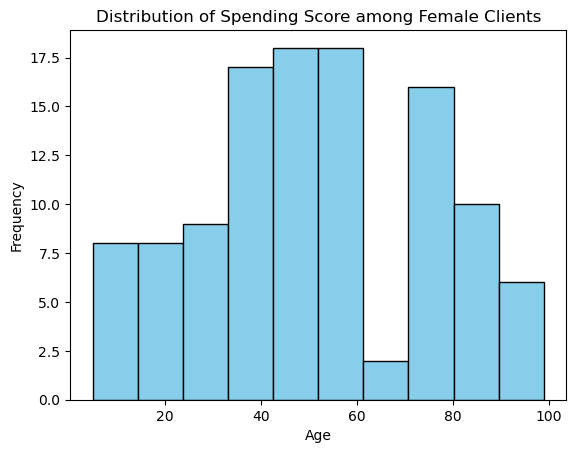

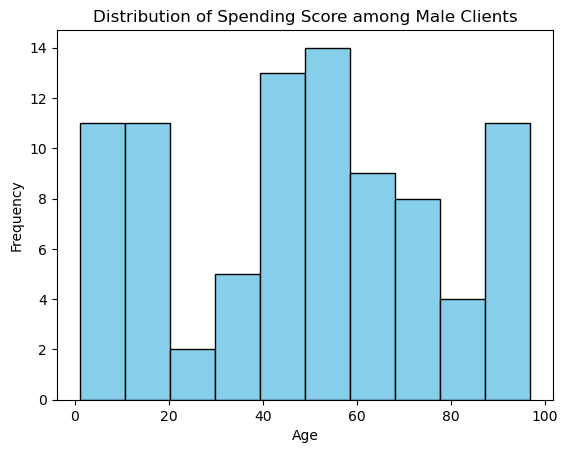

In [276]:
# Question h)

female_ages = clients_df[clients_df['Gender'] == 'Female']['Spending Score (1-100)']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Spending Score among Female Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

female_ages = clients_df[clients_df['Gender'] == 'Male']['Spending Score (1-100)']
plt.hist(female_ages, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Spending Score among Male Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## 2. Groupement simple avec la méthode des k-moyennes

### 2a. Groupement avec deux attributs, en trois groupes

Pour commencer, veuillez utiliser la méthode [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) avec initialisation aléatoire, un seul essai, et en fixant le nombre de groupes à trois (3).  De plus, veuillez utiliser seulement les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' des données.

In [277]:
# Votre code ici:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(X)


C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(init='random', n_clusters=3, n_init=1, random_state=42)

Veuillez afficher les données en 2D (_annual income_ et _spending score_) en indiquant l'appartenance aux clusters par des couleurs différentes.  Veuillez utiliser des marqueurs différents pour les hommes et pour les femmes.

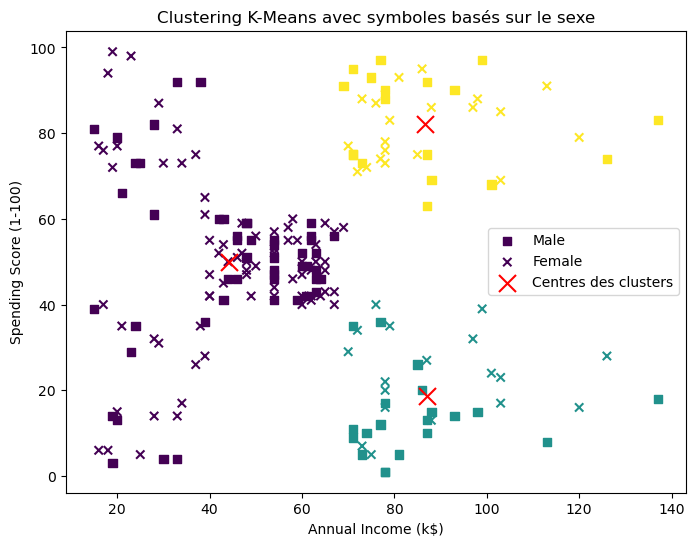

In [278]:

sex = clients_df['Gender']
clients_df['Cluster'] = kmeans.labels_
markers = {'Male': 's', 'Female': 'x'}
plt.figure(figsize=(8,6))

for gender, marker in markers.items():

    # on fait un mask avec le genre du tuple
    gender_mask = (sex == gender)
    plt.scatter(X['Annual Income (k$)'][gender_mask], 
                X['Spending Score (1-100)'][gender_mask], 
                c=kmeans.labels_[gender_mask], 
                cmap='viridis', 
                marker=marker,
                label=gender)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=150, c='red', marker='x', label='Centres des clusters')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering K-Means avec symboles basés sur le sexe')
plt.legend()
plt.show()


**Question :** comment appréciez-vous la qualité du groupement obtenu ?  Veuillez la discuter. 

In [279]:
# Vos commentaires ici:


### 2b. Choix individuel d'un nombre de groupes plus adapté

Sur la base de la question précédente, veuillez effectuer le groupement avec le nombre de groupes qui vous semble le plus adapté, autre que 3.  Veuillez effectuer 10 initialisations aléatoires.

Pour l'affichage, veuillez afficher également les centroïdes des groupes (obtenus de `KMeans`), en utilisant une étoile noire. 

In [280]:
# Votre code ici:


C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

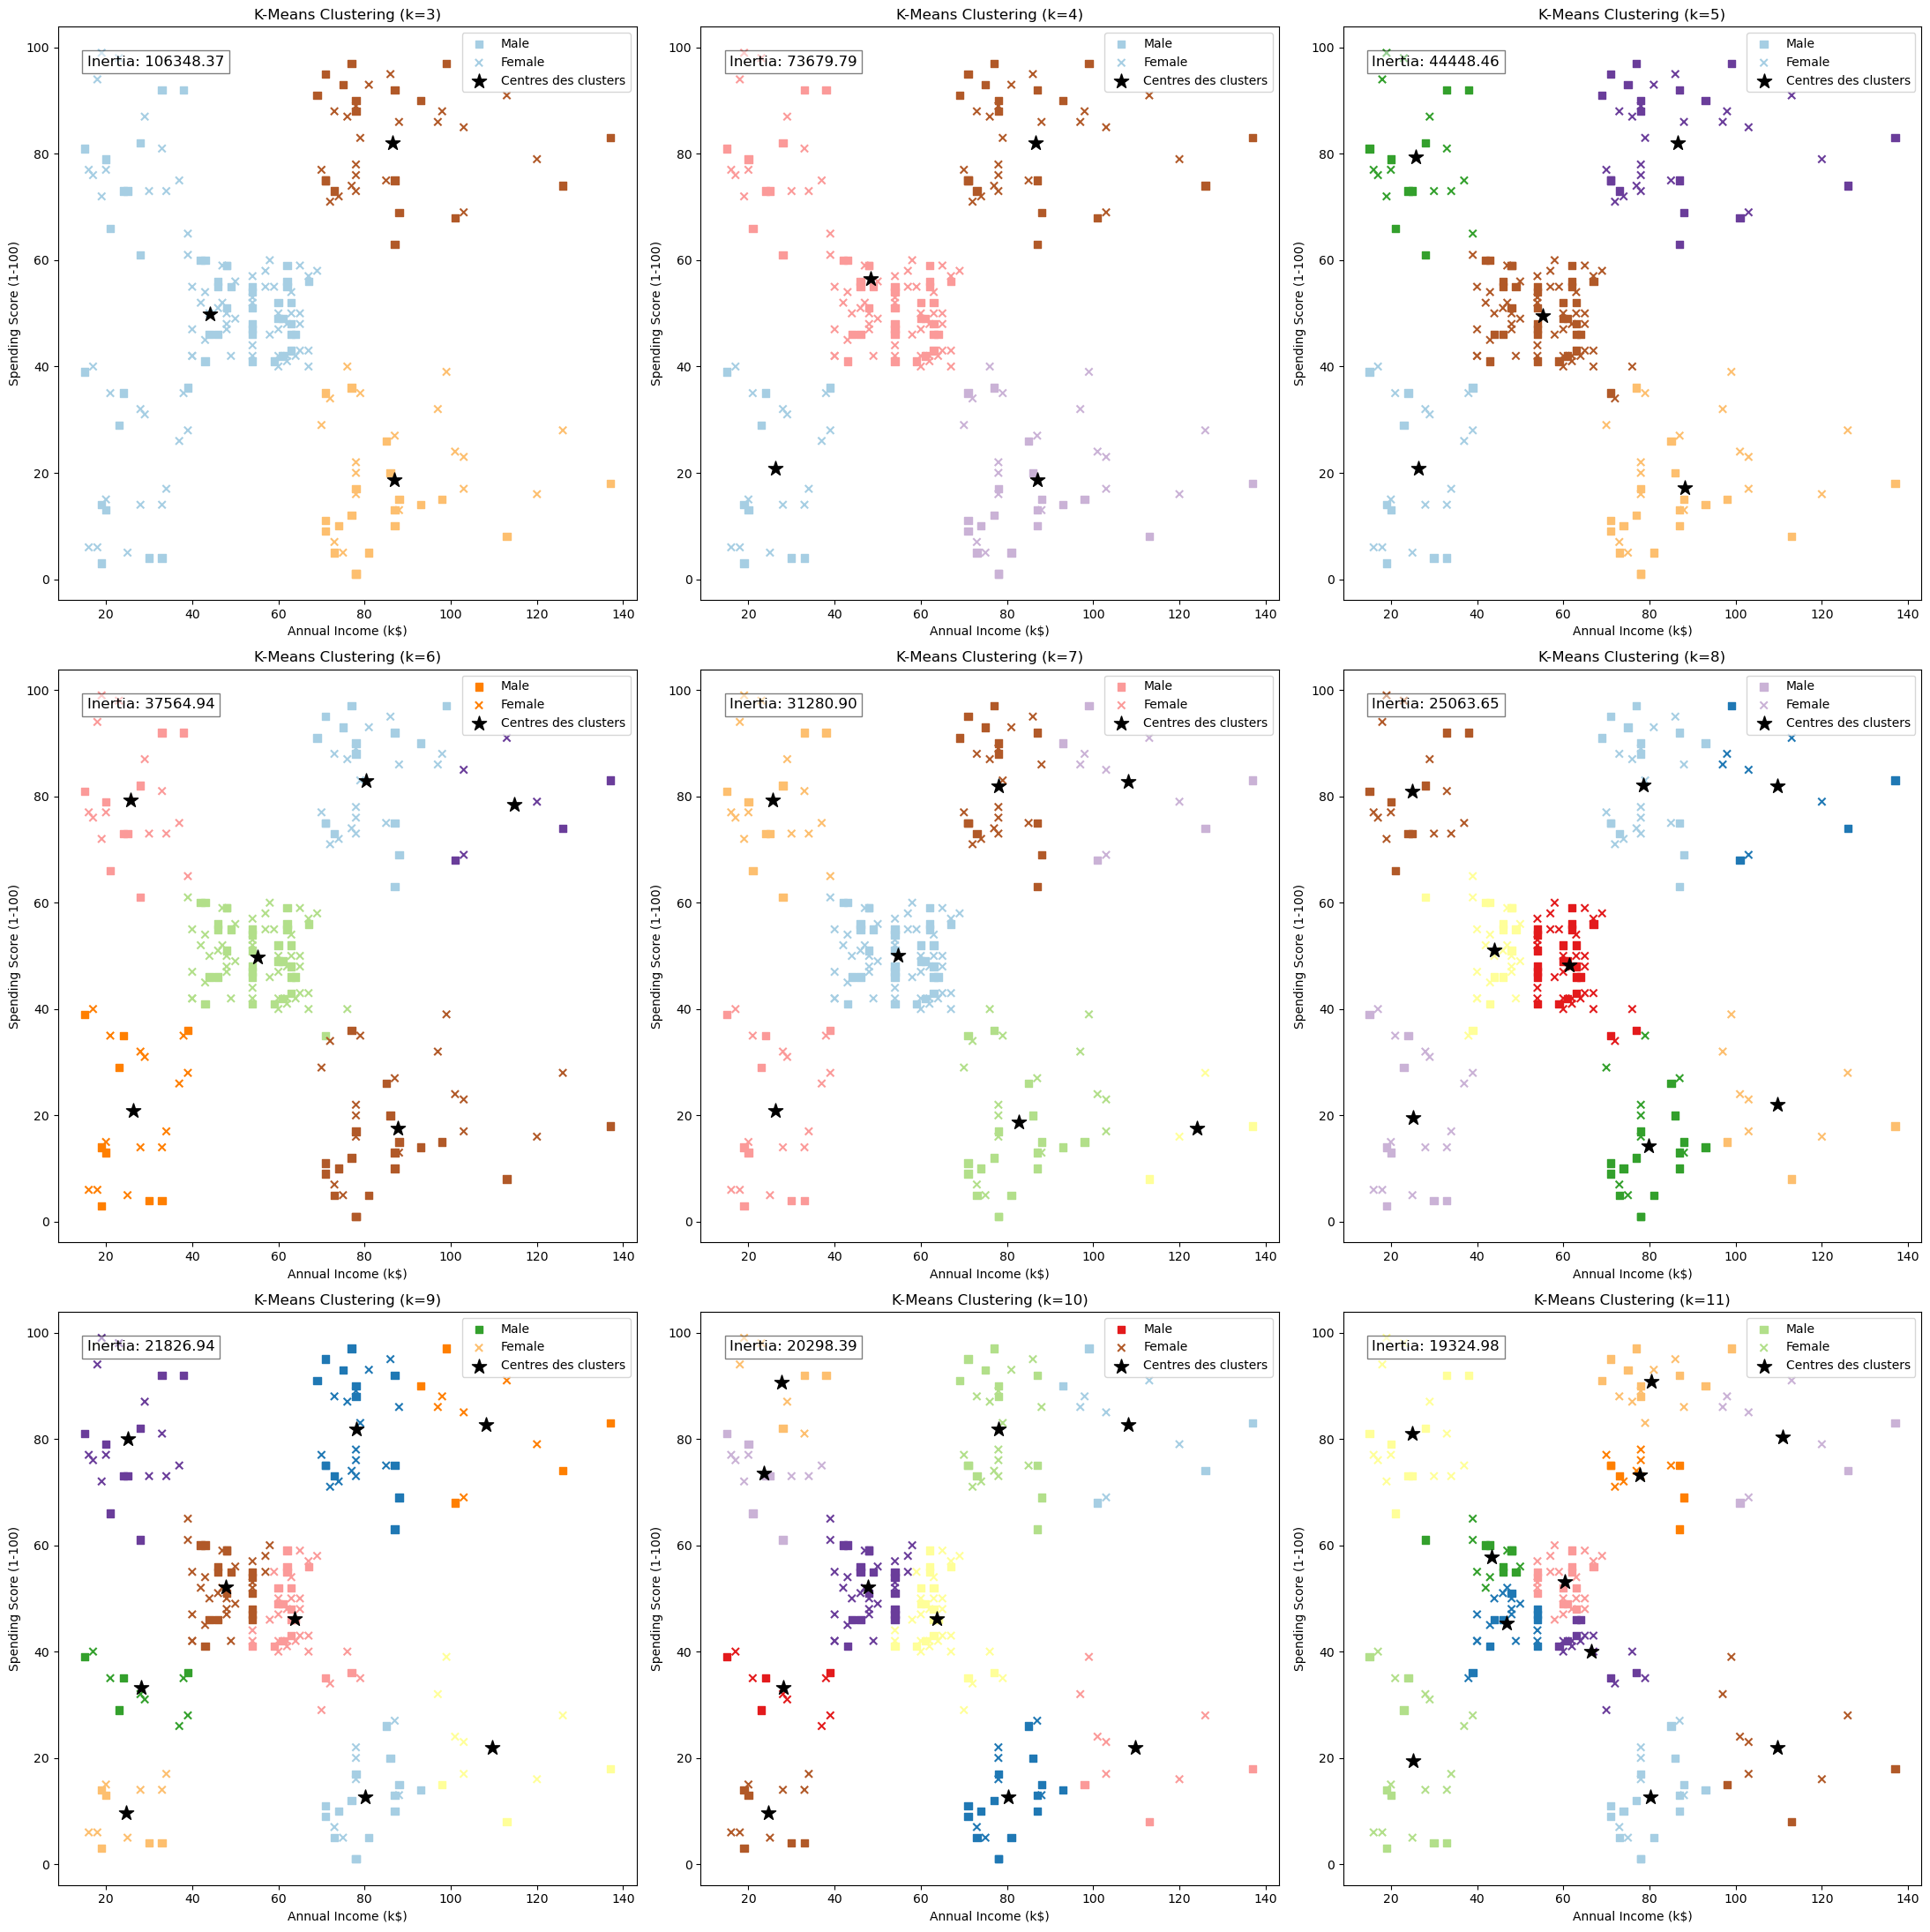

In [281]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)']]
sex = clients_df['Gender']
markers = {'Male': 's', 'Female': 'x'}

fig, axes = plt.subplots(3, 3, figsize=(22, 22))
axes = axes.flatten()

for i, k in enumerate(range(3, 12)):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    kmeans.fit(X)
    
    clients_df['Cluster'] = kmeans.labels_
    for gender, marker in markers.items():
        gender_mask = (sex == gender)
        axes[i].scatter(X['Annual Income (k$)'][gender_mask], 
                         X['Spending Score (1-100)'][gender_mask], 
                         c=kmeans.labels_[gender_mask], 
                         cmap='Paired', 
                         marker=marker,
                         label=gender)
    
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                    s=150, c='black', marker='*', label='Centres des clusters')

    inertia_text = f'Inertia: {kmeans.inertia_:.2f}'
    axes[i].text(0.05, 0.95, inertia_text, transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel('Annual Income (k$)')
    axes[i].set_ylabel('Spending Score (1-100)')
    axes[i].legend()
plt.tight_layout()
plt.show()


**Question :** comment appréciez-vous la qualité du nouveau groupement ?  Veuillez la discuter. 
    
Pouvez-vous décrire chaque groupe en fonction des valeurs des deux axes ?

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

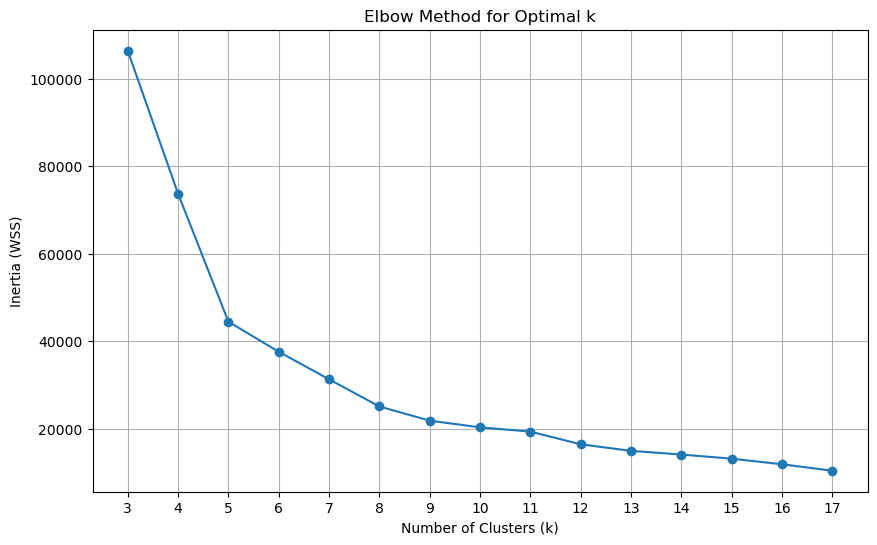

In [282]:
# Vos commentaires ici, si nécessaire:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia_values = []
k_values = range(3, 18)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.xticks(k_values)
plt.grid()
plt.show()


## 3. Groupements optimisés en 3D

Dans cette section, vous allez utiliser l'initialisation k-means++ (un seul tirage), et optimiser le nombre de groupes par la méthode du coude (_elbow_).  Puis, vous allez ajouter la dimension de l'âge et afficher les groupes en 3D.

### 3a. Méthode du coude et initialisation k-means++

Dans tout ce qui suit, vous allez initialiser les centroïdes avec k-means++ (paramètre `init`) et exécuter 5 fois l'algorithme des k-moyennes (paramètre `n_init`).

Veuillez afficher les valeurs du coefficient WSS (Within-cluster Sum of Squares) ou **inertie** pour un nombre de groupes variant de 1 à 9.  Travaillez pour l'instant en deux dimensions, comme avant.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

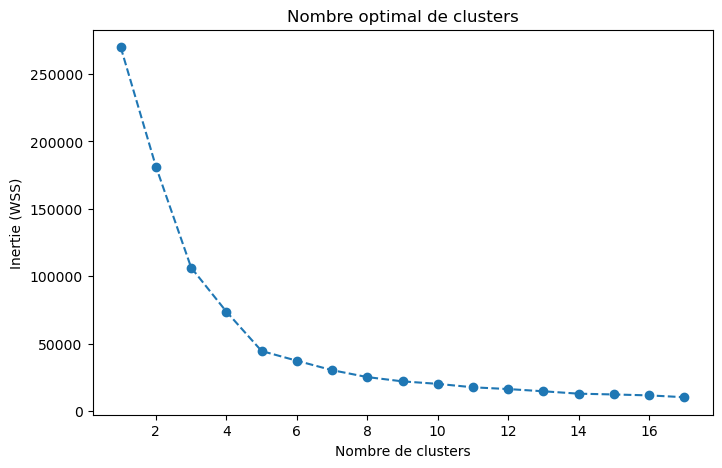

In [283]:
# Votre code ici:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)']]

wss = [] # résultat des tests
for i in range(1, 18):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 18), wss, marker='o', linestyle='--')
plt.title('Nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (WSS)')
plt.show()


**Question :** quel est le nombre de groupes qui est optimal d'après cette méthode ?

# Votre réponse ici:
Nous observons que à partir de 5 clusters nous obtenons un WSS (variation intra-cluster intéressante).

Veuillez effectuer le groupement avec le nombre de groupes optimal et les paramètres indiqués pour cette section.  

Veuillez **afficher le résultat** avec le même format que dans la figure précédente.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



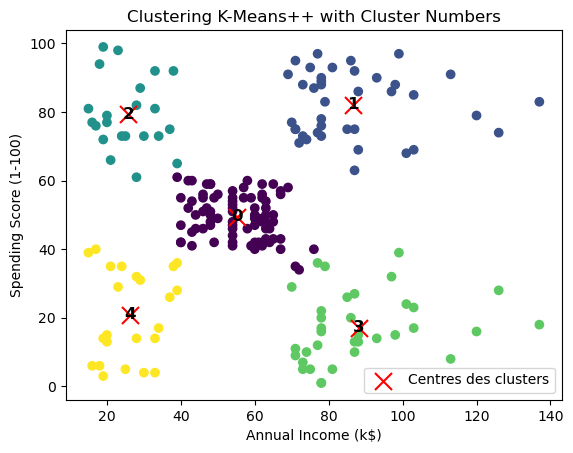

In [284]:
# Votre code ici:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=5, random_state=42)
kmeans.fit(X)
clients_df['Cluster'] = kmeans.labels_

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', marker='x', label='Centres des clusters')

for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], str(i), color='black', fontsize=12, ha='center', va='center', fontweight='bold')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering K-Means++ with Cluster Numbers')
plt.legend()
plt.show()



**Question :** comment se compare ce groupement à celui obtenu au 2b ?

## Votre réponse ici:

Il est aussi mauvais que le kmean de loyd avec k=5. le wss est légèrement plus haut que le kmeans loyd ~50000

Veuillez calculer le nombre de femmes et d'hommes, respectivement, dans chaque groupe.  Dans quels groupes y a-t-il plus d'hommes que de femmes, et quelles sont les propriétés de ces groupes (revenu, score) ?

In [285]:
# Votre code ici:

df_1 = clients_df.groupby(['Cluster', 'Gender']).size().reset_index(name='count') # ajouter une colonne 'count' pour chaque groupe
df_1.sort_values(by=['Cluster'])
# le cluster #3 est le seul à comporter plus d'hommes que de femmes 
# Nous pouvons noter que les clusters sont relativement bien équilibrés

,Cluster,Gender,count
0,0,Female,48
1,0,Male,33
2,1,Female,21
3,1,Male,18
4,2,Female,13
5,2,Male,9
6,3,Female,16
7,3,Male,19
8,4,Female,14
9,4,Male,9


In [286]:
# Votre réponse ici:
df_2 = clients_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(df_2)
# Nous observons que #3 est celui dont les hommes sont le plus représentés. Il est également celui dont le score des dépenses est le plus faible.


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


### 3b. Groupement utilisant 3 attributs

Veuillez utiliser à partir de maintenant aussi l'attribut de l'âge.  Veuillez déterminer le nombre optimal de groupes par la méthode du coude, et garder l'initialisation k-means++ avec 5 exécutions.  Dans cette section, on vous demande aussi d'afficher les groupes en 3D.

In [287]:
clients_df['Gender'] = clients_df['Gender'].map({'Male': 1, 'Female': 0})


C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Window

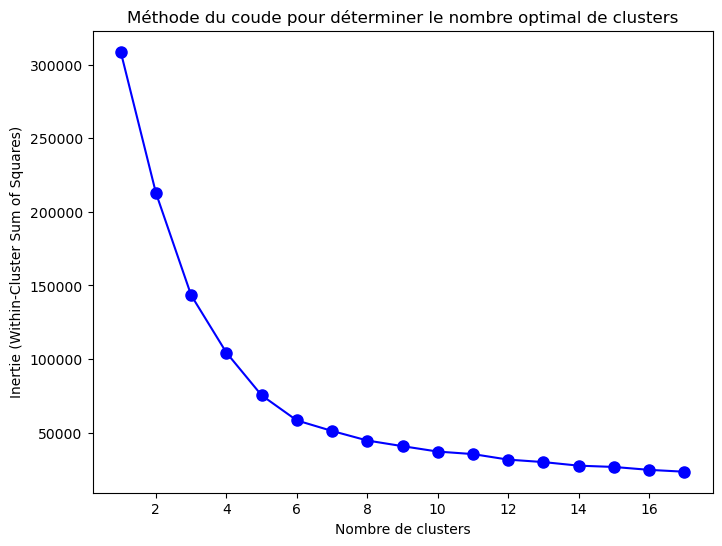

In [288]:
# Votre code ici:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

wss = []

for k in range(1, 18):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=5, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 18), wss, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Within-Cluster Sum of Squares)')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()


C:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



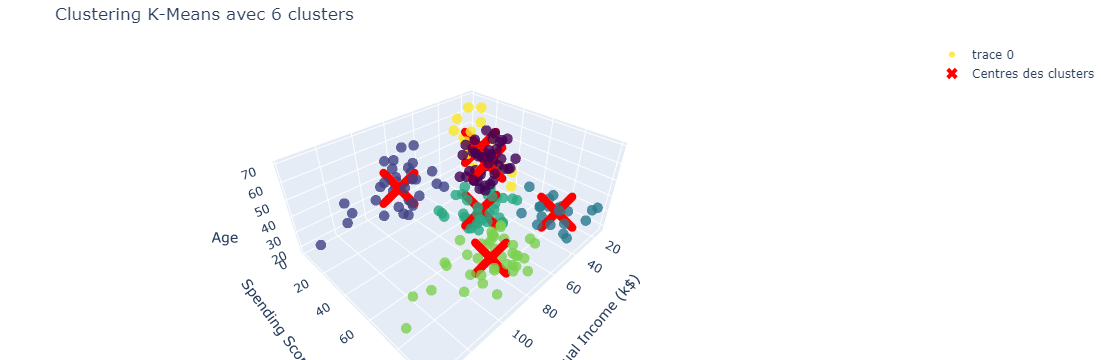

In [289]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans


X = clients_df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
clients_df['Cluster'] = kmeans.labels_

fig = go.Figure()

# construire le graphe
fig.add_trace(go.Scatter3d(
    x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],z=X['Age'],mode='markers',marker=dict(
        size=6,
        color=clients_df['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    )
))

# Ajouter les centres des clusters
centers = kmeans.cluster_centers_
fig.add_trace(go.Scatter3d(x=centers[:, 0],y=centers[:, 1],z=centers[:, 2],mode='markers',marker=dict(
        size=10,
        color='red',
        symbol='x',
        opacity=1.0
    ),
    name='Centres des clusters'
))

# Mettre en place les titres et les axes
fig.update_layout(
    title=f'Clustering K-Means avec {optimal_clusters} clusters',
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()


**Question :** comment se compare ce groupement à celui obtenu au 2b ?

## Votre réponse ici:
nous voyons qu'en ajoutant la dimension age nous obtenons un meilleur clustering avec un k = 6. En effet nous découvrons un cluster supplémentaire relatif  l'age.

**Question :** serait-il difficile d'ajouter le paramètre 'Gender' (avec les valeurs 'Male' et 'Female') comme 4e attribut pour effectuer le groupement ?  Veuillez discuter la pertinence de cette idée.

## Votre réponse ici:
Oui il serait difficile d'ajouter une variable 'Gender'.
1. Celle-ci est de nature catégorielle. En conséquence l'algorithme K-means ne permettra pas de calculer les distances (WSS) de manière appropriée.
2. Le jeu de données est relativement équilibré entre les 'sexes' ce qui n'apportera pas d'information supplémentaire dans l'algorithme.
3. La visualisation en dimensions > 3 ne sera pas possible...

***
**Fin du Labo 1.**  Veuillez nettoyer ce notebook en gardant seulement les réponses et résultats désirés, l'enregistrer en remplaçant 'student' par votre nom, et le soumettre sur Cyberlearn.